In [1]:
#using LinearAlgebra, SparseArrays
import LowLevelFEM as FEM
using LowLevelFEM

gmsh.initialize()

In [2]:
using Plots

In [3]:
# Adatok
E = 2e5
ν = 0.3
ρ = 7.85e-9
thick = 1
height = 10
base = 100
elemSize = 2 #22

approxOrder = 2
internalNodes = true
quadElements = true

true

In [4]:
gmsh.model.add("rectangle")

p1 = gmsh.model.occ.addPoint(0, 0, 0)
p2 = gmsh.model.occ.addPoint(base, 0, 0)
p3 = gmsh.model.occ.addPoint(base, height, 0)
p4 = gmsh.model.occ.addPoint(0, height, 0)

l1 = gmsh.model.occ.addLine(p1, p2)
l2 = gmsh.model.occ.addLine(p2, p3)
l3 = gmsh.model.occ.addLine(p3, p4)
l4 = gmsh.model.occ.addLine(p4, p1)

cl1 = gmsh.model.occ.addCurveLoop([l1, l2, l3, l4])

l5 = gmsh.model.occ.addCircle(base / 2, height / 2, 0, min(base, height) / 4)
cl2 = gmsh.model.occ.addCurveLoop([l5])

sf1 = gmsh.model.occ.addPlaneSurface([cl1, cl2])

gmsh.model.occ.synchronize()

In [5]:
phg = gmsh.model.addPhysicalGroup(1, [l2])
gmsh.model.setPhysicalName(1, phg, "supp")
phg = gmsh.model.addPhysicalGroup(1, [l4])
gmsh.model.setPhysicalName(1, phg, "load")
phg = gmsh.model.addPhysicalGroup(2, [sf1])
gmsh.model.setPhysicalName(2, phg, "body")

In [6]:
FEM.generateMesh(sf1, elemSize, approxOrder=approxOrder, algorithm=6, quadrangle=quadElements, internalNodes=internalNodes)

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 40%] Meshing curve 3 (Line)
Info    : [ 60%] Meshing curve 4 (Line)
Info    : [ 80%] Meshing curve 5 (Circle)
Info    : Done meshing 1D (Wall 0.000461642s, CPU 0.000445s)
Info    : 118 nodes 123 elements
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0250531s, CPU 0.025015s)
Info    : 359 nodes 723 elements
Info    : Recombining 2D mesh...
Info    : Blossom: 841 internal 118 closed
Info    : Blossom recombination completed (Wall 0.0141952s, CPU 0.014177s): 294 quads, 0 triangles, 0 invalid quads, 0 quads with Q < 0.1, avg Q = 0.799105, min Q = 0.508151
Info    : Done recombining 2D mesh (Wall 0.0142529s, CPU 0.014235s)
Info    : Meshing order 2 (curvilinear on)...
Info    : [  0%] Meshing curve 1 order 2
Info    : [ 20%] Meshing curve 2 order 2
Info    : [ 40%] Meshing curve 3 order 2
Info    : [ 50%] Meshin

In [7]:
mat = FEM.material("body", E=E, ν=ν)
problem = FEM.Problem([mat], type="PlaneStress", thickness=thick)

Info    : RCMK renumbering...
Info    : Done RCMK renumbering (bandwidth is now 84)


LowLevelFEM.Problem("rectangle", "PlaneStress", 2, [("body", 200000.0, 0.3, 7.85e-9)], 1.0, 1294)

In [8]:
supp = FEM.displacementConstraint("supp", ux=0, uy=0)
load = FEM.load("load", fx=1, fy=0)

("load", 1, 0, 0)

In [9]:
ENV["LIBGL_ALWAYS_SOFTWARE"] = "true"
#gmsh.fltk.run()
#gmsh.fltk.wait(3)

"true"

In [10]:
# Néhány láthatósági beállítás 0:kikapcs. 1:bekapcs.
gmsh.option.setNumber("Geometry.CurveLabels", 0)
gmsh.option.setNumber("Geometry.Points", 0)
gmsh.option.setNumber("Geometry.Curves", 0)
gmsh.option.setNumber("Mesh.Points", 0)
gmsh.option.setNumber("Mesh.Lines", 0)
gmsh.option.setNumber("Mesh.SurfaceEdges", 0)
gmsh.option.setNumber("Mesh.NodeLabels", 0)
gmsh.option.setNumber("Mesh.LineLabels", 0)
gmsh.option.setNumber("Mesh.SurfaceLabels", 0)

In [11]:
K = FEM.stiffnessMatrix(problem)

2588×2588 SparseArrays.SparseMatrixCSC{Float64, Int64} with 77152 stored entries:
⎡⣿⣿⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠙⣿⣿⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠈⠛⢿⣷⡆⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠈⢩⣿⣿⡳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠙⢮⣻⣾⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⡿⣯⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⡿⣯⣳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢾⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢾⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢾⣿⣿⡳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢮⡻⣮⡿⣤⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠛⣯⡿⣯⡷⣤⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⣯⡿⣯⡿⣄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠛⢯⡟⣭⡻⡄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠛⠮⣿⣿⣳⢦⡀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⣞⢻⣶⢿⣆⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⢷⣿⣿⣷⡀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠻⣿⣿⎦

In [12]:
f = FEM.loadVector(problem, [load])

2588-element Vector{Float64}:
 1.3333333333333335
 0.0
 0.0
 0.0
 0.33333333333333326
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [13]:
M = FEM.massMatrix(problem)

2588×2588 SparseArrays.SparseMatrixCSC{Float64, Int64} with 2588 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⎦

In [14]:
C = 4e-3 * K

2588×2588 SparseArrays.SparseMatrixCSC{Float64, Int64} with 77152 stored entries:
⎡⣿⣿⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠙⣿⣿⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠈⠛⢿⣷⡆⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠈⢩⣿⣿⡳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠙⢮⣻⣾⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⡿⣯⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⡿⣯⣳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢾⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢾⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢾⣿⣿⡳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢮⡻⣮⡿⣤⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠛⣯⡿⣯⡷⣤⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⣯⡿⣯⡿⣄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠛⢯⡟⣭⡻⡄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠛⠮⣿⣿⣳⢦⡀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⣞⢻⣶⢿⣆⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⢷⣿⣿⣷⡀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠻⣿⣿⎦

In [15]:
FEM.applyBoundaryConditions!(problem, K, M, C, f, [supp]);

In [16]:
Tₘᵢₙ = FEM.smallestPeriodTime(K, M)

2.745273270892754e-7

In [17]:
q = FEM.solveDisplacement(K, f)

2588-element Vector{Float64}:
  0.0005387829548602859
 -6.111543764527857e-6
  0.0005337852269266583
 -7.609271706366227e-6
  0.0005387852269261025
 -7.611543765267011e-6
  0.0005340599782269392
 -6.188582517689077e-6
  0.0005343347295108593
 -4.767893320053853e-6
  ⋮
  9.499099728390763e-7
  0.00020941266032568526
  1.4136357794756069e-6
  0.00020567393257201518
  3.0572242600007882e-6
  0.00019896716390175085
  2.347880493957319e-6
  0.0002042722185482093
  1.8920737270628695e-6

In [18]:
dim, dim = size(K)
u0 = zeros(dim)
v0 = zeros(dim)
FEM.initialDisplacement!(problem, "supp", u0, ux=0)
FEM.initialVelocity!(problem, "body", v0, vx=1000)
FEM.initialVelocity!(problem, "supp", v0, vx=0)
f = zeros(dim)

2588-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

$$\mathbf{M}\ddot{\mathbf{q}}+\mathbf{C}\dot{\mathbf{q}}+\mathbf{K}\mathbf{q}=\mathbf{f}$$
$$\mathbf{M}\ddot{\mathbf{q}}_n+\mathbf{C}\dot{\mathbf{q}}_n+\mathbf{K}\mathbf{q}_n=\mathbf{f}_n$$
$$\ddot{\mathbf{q}}_n = \frac{\mathbf{q}_{n+1}-2\mathbf{q}_{n}+\mathbf{q}_{n-1}}{\Delta t^2}$$
$$\dot{\mathbf{q}}_n = \frac{\mathbf{q}_{n}-\mathbf{q}_{n-1}}{\Delta t}$$
$$\mathbf{M}\frac{\mathbf{q}_{n+1}-2\mathbf{q}_{n}+\mathbf{q}_{n-1}}{\Delta t^2}+\mathbf{C}\frac{\mathbf{q}_{n}-\mathbf{q}_{n-1}}{\Delta t}+\mathbf{K}\mathbf{q}_n=\mathbf{f}_n$$
$$\mathbf{M}(\mathbf{q}_{n+1}-2\mathbf{q}_{n}+\mathbf{q}_{n-1})+\Delta t\mathbf{C}(\mathbf{q}_{n}-\mathbf{q}_{n-1})+\Delta t^2\mathbf{K}\mathbf{q}_n=\Delta t^2\mathbf{f}_n$$
$$\mathbf{M}\mathbf{q}_{n+1}=\left(2\mathbf{M}-\Delta t\mathbf{C}-\Delta t^{2}\mathbf{K}\right)\mathbf{q}_{n}+(\Delta t\mathbf{C}-\mathbf{M})\mathbf{q}_{n-1}+\Delta t^{2}\mathbf{f}_{n}$$

In [19]:
E = problem.material[1][2]
ρ = problem.material[1][4]
c = √(E / ρ)
ξₘₐₓ = 1e-1
β = ξₘₐₓ * Tₘᵢₙ / π
C = β * K
u, v, t = FEM.CDM(K, M, C, f, u0, v0, base / c * 2, Tₘᵢₙ / π * (√(1 + ξₘₐₓ^2) - ξₘₐₓ) * 1.0)
size(u)

(2588, 502)

In [20]:
S = FEM.solveStress(problem, q)

LowLevelFEM.StressField([[-0.9663738559960664; 0.036019482518831844; … ; 0.0; 0.0;;], [-0.9663975402212068; -0.036200824827220264; … ; 0.0; 0.0;;], [-0.9999999984234258; 7.7769842682427e-9; … ; 0.0; 0.0;;], [-0.8796445431632729; 0.06896142305254312; … ; 0.0; 0.0;;], [-0.8801542074253468; -0.07019244514659867; … ; 0.0; 0.0;;], [-1.5954850603590207; 0.19012632658746362; … ; 0.0; 0.0;;], [-0.857990296601945; 0.0977451091200755; … ; 0.0; 0.0;;], [-0.8585320776107754; -0.09817032661198938; … ; 0.0; 0.0;;], [-1.0000000082295897; -3.4855898883002524e-8; … ; 0.0; 0.0;;], [-1.0574252542175853; 0.005285812589508736; … ; 0.0; 0.0;;]  …  [-1.0000000132997888; 2.487223167808754e-8; … ; 0.0; 0.0;;], [-1.0167049213649988; 0.006167045645992172; … ; 0.0; 0.0;;], [-1.000000004928619; -3.6812917164405703e-9; … ; 0.0; 0.0;;], [-1.0000000070401007; 3.116763282758702e-9; … ; 0.0; 0.0;;], [-1.018918305508043; -0.008923567398244445; … ; 0.0; 0.0;;], [-1.0000000088842416; 2.205283898868939e-9; … ; 0.0; 0.0;;],

In [21]:
gmsh.option.setNumber("View.IntervalsType", 3)
gmsh.option.setNumber("View.VectorType", 5)
gmsh.option.setString("View.Format", "%.6g")

In [22]:
uvec = FEM.showDoFResults(problem, q, "uvec", name="uvec", visible=false)
ux = FEM.showDoFResults(problem, q, "ux", name="ux", visible=false)
uy = FEM.showDoFResults(problem, q, "uy", name="uy", visible=false)
uz = FEM.showDoFResults(problem, q, "uz", name="uz", visible=false)
s = FEM.showStressResults(problem, S, "s", name="σ", visible=false, smooth=true)
sx = FEM.showStressResults(problem, S, "sx", name="σx", visible=false, smooth=true)
sy = FEM.showStressResults(problem, S, "sy", name="σy", visible=false, smooth=true)
sz = FEM.showStressResults(problem, S, "sz", name="σz", visible=false, smooth=true)
sxy = FEM.showStressResults(problem, S, "sxy", name="τxy", visible=false, smooth=true)
syz = FEM.showStressResults(problem, S, "syz", name="τyz", visible=false, smooth=true)
szx = FEM.showStressResults(problem, S, "szx", name="τzx", visible=false, smooth=true)
vvec = FEM.showDoFResults(problem, v, t=t, "uvec", name="v(t)", visible=true)
gmsh.view.option.setNumber(vvec, "NormalRaise", 0.03)

Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)


In [23]:
#SS = []
#for i in 1:10
#    S = FEM.solveStress(problem, u[:, i])
#    push!(SS, S)
#end
#SS

In [24]:
#pp1 = gmsh.model.occ.addPoint(0, height / 2, 0)
#pp2 = gmsh.model.occ.addPoint(base, height / 2, 0)
#pp3 = gmsh.model.occ.addPoint(base / 8, height / 4, 0)

#pl1 = gmsh.model.occ.addLine(pp1, pp2)
#pl2 = gmsh.model.occ.addSpline([pp1, pp3, pp2])


#gmsh.model.occ.synchronize()

In [25]:
sts = ceil(Int64, (base / c * 2) / 6 / (Tₘᵢₙ / π * (√(1 + ξₘₐₓ^2) - ξₘₐₓ)))
display(sts)
Sp = FEM.solveStress(problem, u[:, sts])
sp = FEM.showStressResults(problem, Sp, "s", name="σ at t", visible=false, smooth=false);

84

In [26]:
Sanim = FEM.solveStress(problem, u[:, 1:sts])
sanim = FEM.showStressResults(problem, Sanim, "s", t=t[1:sts], name="σ anim", visible=false, smooth=false);

In [27]:
#gmsh.option.setNumber("PostProcessing.Binary", 1)
#gmsh.option.setNumber("PostProcessing.SaveMesh", 1)

#gmsh.write("rect.msh")
#gmsh.write("rect.opt")
#gmsh.view.write(4, "rect.pos")

In [28]:
ENV["LIBGL_ALWAYS_SOFTWARE"] = "false"
#gmsh.fltk.run()

"false"

In [29]:
gmsh.view.probe(vvec, 1, 10, 0, 1)

([999.9999999999999, 3.3831057970377924e-16, 0.0], 0.0)

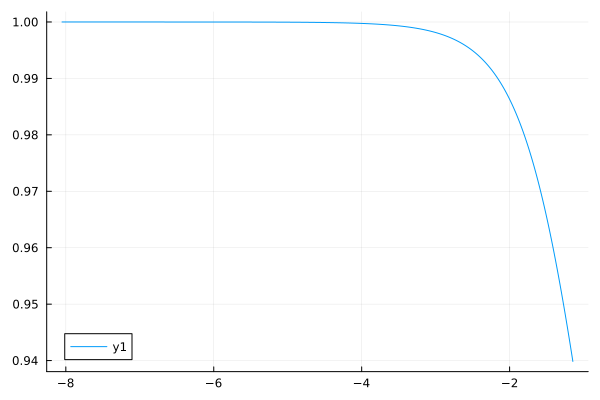

In [30]:
plt = FEM.HHTaccuracyAnalysis(Tₘᵢₙ, Tₘᵢₙ / π, "spectralRadius", n=1000, α=-0.062, β=0.3025, γ=0.6)

plot(plt)

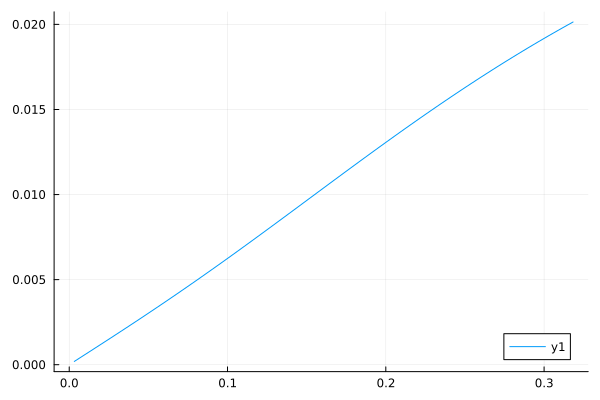

In [31]:
plt = FEM.HHTaccuracyAnalysis(Tₘᵢₙ, Tₘᵢₙ / π, "dampingCharacter", α=-0.062, β=0.3025, γ=0.6)

plot(plt)

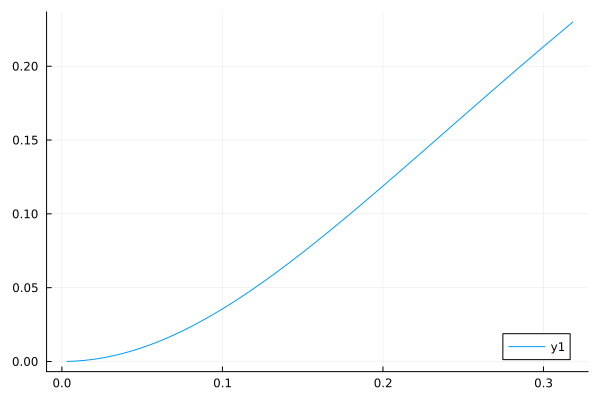

In [32]:
plt = FEM.HHTaccuracyAnalysis(Tₘᵢₙ, Tₘᵢₙ / π, "periodError", α=-0.062, β=0.3025, γ=0.6)

plot(plt)

In [61]:
Tₘᵢₙ /= 2
ξₘₐₓ = 0.32
dt = Tₘᵢₙ / π * (√(1 + ξₘₐₓ^2) - ξₘₐₓ) * 0.4
b = ξₘₐₓ * Tₘᵢₙ / π

1.3981561958420407e-8

In [ ]:
plt = FEM.RayleighDampingAccuracyAnalysis(Tₘᵢₙ, dt, "spectralRadius", n=1000, α=0.0, β=b)

plot(plt)

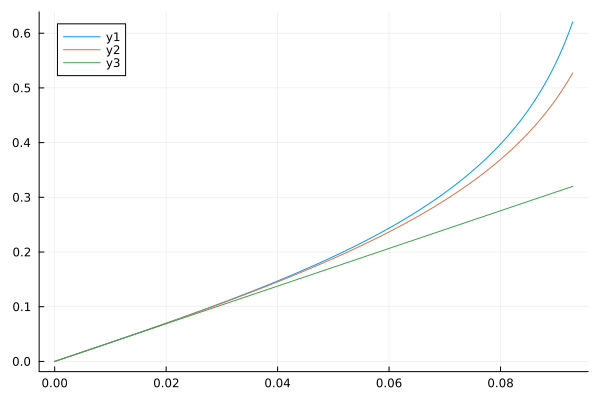

In [62]:
x1, y1 = FEM.RayleighDampingAccuracyAnalysis(Tₘᵢₙ, dt, "dampingCharacter", n=1000, α=0.0, β=b)
x2, y2 = FEM.RayleighDampingAccuracyAnalysis(Tₘᵢₙ, dt, "dampingCharacter2", n=1000, α=0.0, β=b)

plot([x1, x2], [y1, y2])
xx = range(0, dt / Tₘᵢₙ, 1000)
plot!(xx, ξₘₐₓ / (dt / Tₘᵢₙ) * xx)
#xlims!(0,0.01)
#ylims!(0,0.001)

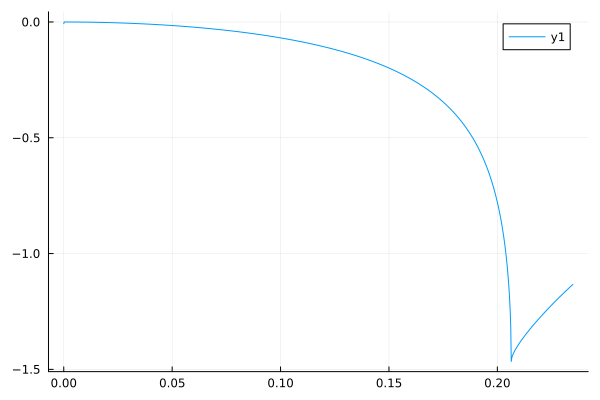

In [36]:
plt = FEM.RayleighDampingAccuracyAnalysis(Tₘᵢₙ, dt, "periodError", n=1000, α=0.0, β=b)

plot(plt)

In [44]:
gmsh.finalize()